# **Zillow Housing Market Data Analysis**
## Objective
This notebook explores Zillow housing market data to identify patterns in affordability and market dynamics. It includes:
- Data preprocessing and merging.
- Feature engineering for metrics like rent-to-income ratios and market trends.
- Clustering to identify housing market patterns.
- Visualization of clusters and insights.
---

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Display settings for clean outputs
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme(style = "whitegrid")

## Step 1: Load Data
Update file paths for the downloaded Zillow CSV files. Ensure the file paths are correct for your local system.

In [5]:
# Define file paths
zhvi_file = 'data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
zori_file = 'data/Metro_zori_uc_sfrcondomfr_sm_month.csv'

# Load datasets
zhvi_data = pd.read_csv(zhvi_file)
zori_data = pd.read_csv(zori_file)

# Display previews
print("ZHVI Data Preview: ")
print(zhvi_data.head())

print("\nZORI Data Preview: ")
print(zori_data.head())

ZHVI Data Preview: 
   RegionID  SizeRank       RegionName RegionType StateName  2000-01-31  \
0    102001         0    United States    country       NaN   121618.12   
1    394913         1     New York, NY        msa        NY   216209.13   
2    753899         2  Los Angeles, CA        msa        CA   220054.25   
3    394463         3      Chicago, IL        msa        IL   152313.40   
4    394514         4       Dallas, TX        msa        TX   124931.82   

   2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  \
0   121832.08   122097.43   122666.55   123321.54   124023.78   124767.58   
1   217127.90   218055.18   219934.20   221879.99   224037.18   226393.97   
2   220873.13   221963.87   224134.08   226507.61   228864.51   231280.58   
3   152454.40   152722.94   153390.98   154194.55   155096.38   156056.26   
4   124987.47   125051.44   125217.56   125436.59   125658.29   125890.74   

   2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  200

## Step 2: Data Cleaning
- Handle missing values.
- Align datasets by common geography and dates.

In [11]:
# Find the most recent date column dynamically
latest_date_zhvi = zhvi_data.columns[-1]  # Assuming the last column is the most recent date
latest_date_zori = zori_data.columns[-1]  # Same assumption

# Select RegionName and the latest date column
zhvi_data = zhvi_data[['RegionName', latest_date_zhvi]]
zori_data = zori_data[['RegionName', latest_date_zori]]

# Rename columns for clarity
zhvi_data.rename(columns={latest_date_zhvi: 'ZHVI'}, inplace=True)
zori_data.rename(columns={latest_date_zori: 'ZORI'}, inplace=True)

# Merge on RegionName
merged_data = pd.merge(zhvi_data, zori_data, on='RegionName', how='inner')

# Display the merged dataset
print("Cleaned and Merged Data Preview: ")
print(merged_data.head())

Cleaned and Merged Data Preview:
        RegionName      ZHVI    ZORI
0    United States 359098.76 2009.01
1     New York, NY 673519.05 3312.65
2  Los Angeles, CA 948517.69 2960.44
3      Chicago, IL 322812.99 2012.13
4       Dallas, TX 368846.51 1760.89


## Step 3: Feature Engineering
Create meaningful metrics such as rent-to-income ratio for clustering analysis.
   

In [12]:
# Feature engineering
merged_data['Rent_to_Income'] = merged_data['ZORI'] / merged_data['ZHVI']

# Standardize features for clustering
scaler = StandardScaler()
features = merged_data[['ZHVI', 'ZORI', 'Rent_to_Income']]
scaled_features = scaler.fit_transform(features)

print("Feature Engineering Complete. Scaled Features Preview: ")
print(pd.DataFrame(scaled_features, columns=features.columns).head())
   

Feature Engineering Complete. Scaled Features Preview: 
   ZHVI  ZORI  Rent_to_Income
0  0.21  0.87            0.30
1  1.92  3.17           -0.21
2  3.42  2.55           -1.54
3  0.01  0.88            0.77
4  0.26  0.43           -0.31


## Step 4: Clustering
Apply K-Means clustering to group regions based on housing affordability and market trends.
   

Cluster Distribution: 
Cluster
3    253
0    183
1    173
2     26
Name: count, dtype: int64


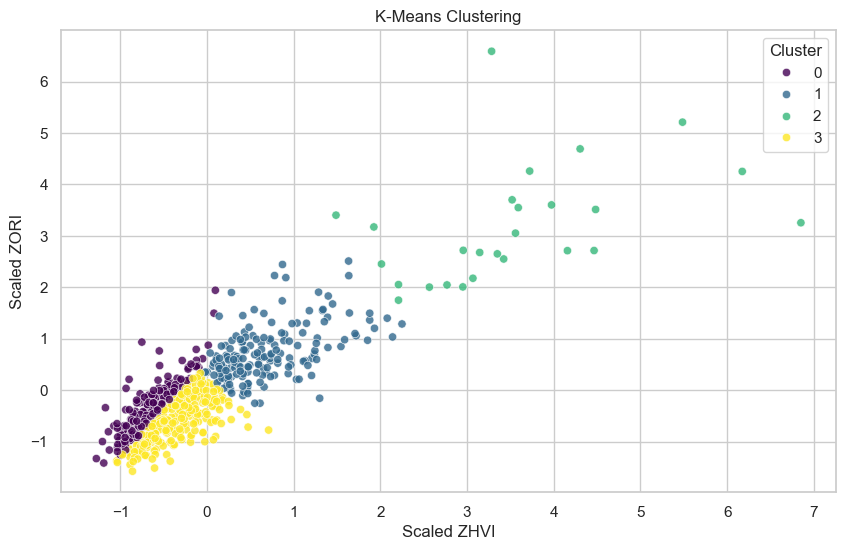

In [14]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display cluster distribution
print("Cluster Distribution: ")
print(merged_data['Cluster'].value_counts())
      
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], 
    hue=merged_data['Cluster'], palette='viridis', alpha=0.8
    )
plt.title('K-Means Clustering')
plt.xlabel('Scaled ZHVI')
plt.ylabel('Scaled ZORI')     
plt.legend(title='Cluster')
plt.show()

## Step 5: Insights and Conclusion
Analyze the clusters to uncover meaningful trends and patterns in housing markets. Visualize findings and discuss limitations.
   